In [170]:
#imports
import numpy as np 
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score 

# Selecting and Dividing the Data

In [171]:
#data
rawData = pd.read_csv('credit3.csv')
rawData.head()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
0,0,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,1,0,0,0,0,1,1,0
1,1,120000,2,26,-1,2,0,0,0,2,...,0,2000,1,0,0,0,0,1,1,0
2,2,90000,2,34,0,0,0,0,0,0,...,1000,5000,1,0,0,0,0,1,0,1
3,3,50000,1,37,0,0,0,0,0,0,...,1069,1000,1,0,0,0,0,1,0,1
4,4,50000,1,57,-1,0,-1,0,0,0,...,689,679,0,1,0,0,0,1,0,1


In [172]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   ID                                      30000 non-null  int64
 1   LIMIT_BAL                               30000 non-null  int64
 2   MARRIAGE                                30000 non-null  int64
 3   AGE                                     30000 non-null  int64
 4   PAY_0                                   30000 non-null  int64
 5   PAY_2                                   30000 non-null  int64
 6   PAY_3                                   30000 non-null  int64
 7   PAY_4                                   30000 non-null  int64
 8   PAY_5                                   30000 non-null  int64
 9   PAY_6                                   30000 non-null  int64
 10  BILL_AMT1                               30000 non-null  int64
 11  BILL_AMT2      

# Building the Models and Choosing the Right Model

In [287]:
#features
x = rawData.iloc[0:]
print('Summary of feature sample')
x.head()

Summary of feature sample


,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
0,0,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,1,0,0,0,0,1,1,0
1,1,120000,2,26,-1,2,0,0,0,2,...,0,2000,1,0,0,0,0,1,1,0
2,2,90000,2,34,0,0,0,0,0,0,...,1000,5000,1,0,0,0,0,1,0,1
3,3,50000,1,37,0,0,0,0,0,0,...,1069,1000,1,0,0,0,0,1,0,1
4,4,50000,1,57,-1,0,-1,0,0,0,...,689,679,0,1,0,0,0,1,0,1


In [288]:
#dependent variable
y = rawData['AGE']

In [289]:
y.head()

0    24
1    26
2    34
3    37
4    57
Name: AGE, dtype: int64

In [290]:
model = LinearRegression().fit(x,y)

In [291]:
model.coef_

array([-1.56340020e-17,  2.05178015e-16, -1.04928187e-11,  1.00000000e+00,
       -1.14011843e-12, -1.06910294e-12, -1.33822654e-12,  2.06938409e-12,
       -1.18841364e-13,  8.54586986e-13,  1.16225759e-17, -2.78002633e-16,
        5.37608229e-16, -5.03466431e-16,  1.04151487e-16, -2.98221467e-16,
        1.88648577e-17,  1.56315873e-16,  1.62631487e-16,  1.01757494e-16,
       -1.08159316e-16, -3.09624489e-16, -5.97455082e-17,  3.19899326e-17,
        7.52645779e-16,  8.64004617e-16,  8.02109833e-16,  1.15740165e-15,
        3.01970065e-16,  9.98953533e-16])

In [292]:
model.intercept_

-2.6503244043851737e-12

In [293]:
model.score(x,y)

1.0

In [294]:
print(cross_val_score(model, x, y, cv=3)) 

[1. 1. 1.]


In [295]:
algosClass = []

In [296]:
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))

In [297]:
algosClass.append(('Linear Regression',LinearRegression()))

In [298]:
algosClass.append(('Support Vector Regression',SVR()))

In [299]:
#regression
results = []
names = []
for name, model in algosClass:
        result = cross_val_score(model, x,y, cv=3, scoring='r2')
        names.append(name)
        results.append(result)

In [300]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.999988100461234
Linear Regression 1.0
Support Vector Regression -0.0284627442624652


In [301]:
#Train/Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 123)

In [302]:
algo = RandomForestRegressor()

In [303]:
model = algo.fit(x_train,y_train)

# Making Predictions and Evaluating the Results

In [304]:
#Predictions
predictions = model.predict(x_test)

In [305]:
#Evaluating the result
rmse = sqrt(mean_squared_error(y_test, predictions))
predRsquared = r2_score(y_test,predictions)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 1.000
RMSE: 0.012


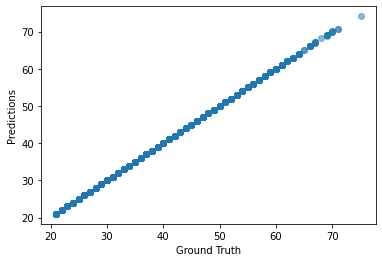

In [306]:
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

# Choosing Limit_bal as the dependant variable

In [323]:
#dependent variable
y = rawData['LIMIT_BAL']

In [324]:
y.head()

0     20000
1    120000
2     90000
3     50000
4     50000
Name: LIMIT_BAL, dtype: int64

In [325]:
model = LinearRegression().fit(x,y)

In [326]:
model.coef_

array([ 1.01019961e-15,  1.00000000e+00,  7.56509476e-12,  9.81977619e-13,
       -1.00003491e-12, -1.66507970e-11,  8.01583944e-12,  2.80140929e-13,
        5.85882606e-12, -6.56738490e-12,  7.21787195e-18, -5.18434589e-16,
       -1.73550922e-16,  5.24354195e-16, -2.13492262e-16, -1.96076680e-16,
       -1.29124348e-16, -3.76968157e-16, -4.87225290e-17,  1.05604949e-16,
        1.57761108e-16, -1.95506065e-16, -4.23065122e-13,  4.23065122e-13,
        5.72874480e-13,  4.76214136e-13, -6.28612717e-13, -4.20475899e-13,
       -1.57339369e-12,  1.57339368e-12])

In [327]:
model.intercept_

-2.0372681319713593e-10

In [328]:
model.score(x,y)

1.0

In [329]:
print(cross_val_score(model, x, y, cv=3)) 

[1. 1. 1.]


In [330]:
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

In [331]:
#regression
results = []
names = []
for name, model in algosClass:
        result = cross_val_score(model, x,y, cv=3, scoring='r2')
        names.append(name)
        results.append(result)

In [332]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.9998894342625096
Linear Regression 1.0
Support Vector Regression -0.016494557659062825


In [333]:
#Train/Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 123)

In [334]:
algo = RandomForestRegressor()

In [335]:
model = algo.fit(x_train,y_train)

In [336]:
#Predictions
predictions = model.predict(x_test)

In [337]:
#Evaluating the result
rmse = sqrt(mean_squared_error(y_test, predictions))
predRsquared = r2_score(y_test,predictions)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 1.000
RMSE: 322.158


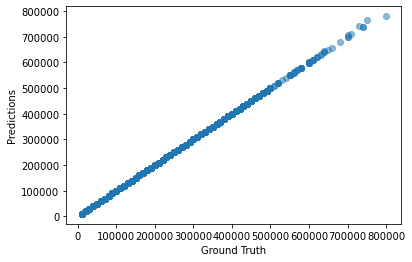

In [338]:
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();